In [1]:
#https://docs.pyq.jp/python/machine_learning/tips/train_test_split.html
#https://www.codexa.net/kaggle-titanic-beginner/
#https://techacademy.jp/magazine/24068
#https://qiita.com/0NE_shoT_/items/b702ab482466df6e5569
#https://bit.ly/3iP7Byp
#https://qiita.com/shibata0523/items/894f7e97cf4e648ed56e
#https://yolo-kiyoshi.com/2017/11/19/post-575/
#https://qiita.com/hikarut/items/21c19edf98c85ec3c3ab#
#http://ja.pymotw.com/2/pkgutil/
#https://stackoverflow.com/questions/56310898/futurewarning-method-ptp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train1 = pd.read_csv('train.csv')
test1 = pd.read_csv('test.csv')
print("the size of the train data: " + str(train1.shape))
print("the size of the test data: " + str(test1.shape))

the size of the train data: (891, 12)
the size of the test data: (418, 11)


# Overview

In [4]:
train1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#Find NaN value
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#examine "Cabin"
train1['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [7]:
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#overall survival rate
train1['Survived'].mean() 

0.3838383838383838

In [9]:
#survival rate by Pclass
train1['Survived'].groupby(train1['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

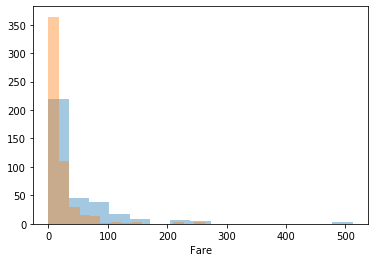

In [14]:
#plot the number of the survived and the dead with regard to "fare"
sns.distplot(train1[train1['Survived']==1]["Fare"], kde=False, rug=False, bins=15, label="Survived")
sns.distplot(train1[train1["Survived"]==0]["Fare"], kde=False, rug=False, bins=15, label="Dead")

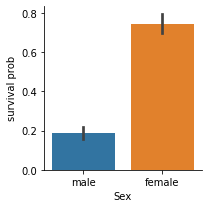

In [15]:
#check the number of survivers by sex
s_s = sns.catplot(x="Sex",y="Survived", data=train1, kind="bar", height = 3)
s_s = s_s.set_ylabels("survival prob")
plt.show() #male(1), femal(0)

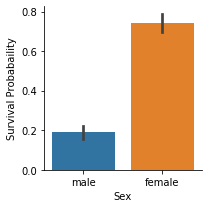

In [16]:
#check the difference of survival ratio between Sex
count_s = sns.catplot(x="Sex", y='Survived', data=train1, kind="bar", height=3) #female(0),male(1)
count_s = count_s.set_ylabels('Survival Probabaility')

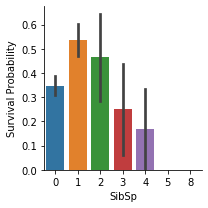

In [17]:
# check the difference of survival ratio by # of SibSp
sib_s = sns.catplot(x="SibSp", y="Survived", data=train1, kind="bar", height=3)
sib_s = sib_s.set_ylabels("Survival Probability")

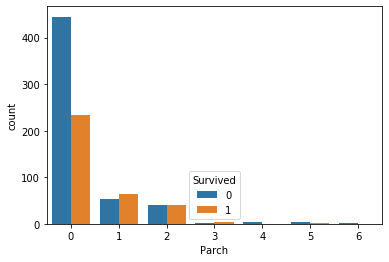

In [18]:
sns.countplot(x="Parch", hue="Survived", data=train1) #female(0), male(1)

# Data Pre-processing

In [19]:
#check the matrix
train1.shape, print(type(train1))

<class 'pandas.core.frame.DataFrame'>


((891, 12), None)

## Find missing value

In [20]:
#Find NaN value
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
train1["Survived"].mean()

0.3838383838383838

In [22]:
#get rid of Columns("PassengerId","Cabin", "Name", "Ticket") from a dataset
drop_col = ["PassengerId","Cabin", "Name", "Ticket"]
train1 = train1.drop(labels = drop_col, axis = 1) 
train1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [23]:
#get rid of rows where "Embarked" is NaN
train1 = train1.dropna(subset= ['Embarked'], axis = 0) #これはグルーピングして近い値（S,C,Qなど）に置き換える方法でもいいかも

## Switch the missing value to 

In [24]:
#Switch NaN in "Age" to median
train1 = train1.fillna({"Age": train1["Age"].median()})
train1.isnull().sum()
train1[887:888]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
889,1,1,male,26.0,0,0,30.0,C


## Digitalize the categorical value

In [25]:
#Find the variety of data
train1_uni = train1.nunique()
train1_uni #"sex" and "embarked" are categorical values which only have 2-3 uniques.

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        247
Embarked      3
dtype: int64

### Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
#Encode "Sex";  "female"→0, "man" →1
le.fit(train1["Sex"])
train1['Sex'] = le.transform(train1['Sex'])
train1['Sex'][0:5] 

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [27]:
le.fit(train1["Embarked"])
train1['Embarked'] = le.transform(train1['Embarked'])
train1["Embarked"][1:8]

1    0
2    2
3    2
4    2
5    1
6    2
7    2
Name: Embarked, dtype: int64

## Standardization 

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#standardize 'Age' and 'Fare'
train1["Age_scale"] = ss.fit_transform(train1.loc[:,  ["Age"]])
train1['Fare_scale'] = ss.fit_transform(train1.loc[:, ["Fare"]])
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_scale,Fare_scale
0,0,3,1,22.0,1,0,7.2500,2,-0.563674,-0.500240
1,1,1,0,38.0,1,0,71.2833,0,0.669217,0.788947
2,1,3,0,26.0,0,0,7.9250,2,-0.255451,-0.486650
3,1,1,0,35.0,1,0,53.1000,2,0.438050,0.422861
4,0,3,1,35.0,0,0,8.0500,2,0.438050,-0.484133


# Statistical model
とりあえずやる

In [29]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
X = train1[["Pclass", "Sex", "Age_scale", "SibSp", "Parch", "Fare_scale", "Embarked"]]
Y = train1["Survived"].values
sLR_model = sm.Logit(Y, sm.add_constant(X))
result = sLR_model.fit(disp=0)
print('---サマリー---')
print(result.summary())

print('---対数オッズ---')
print(result.params)

print('---p値---')
print(result.pvalues)

---サマリー---
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  889
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            7
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.3362
Time:                        15:06:36   Log-Likelihood:                -392.56
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 7.416e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1661      0.410     10.159      0.000       3.362       4.970
Pclass        -1.0846      0.140     -7.771      0.000      -1.358      -0.811
Sex           -2.7315      0.199    -13.7

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Model application

#  Clean up the test_data too

In [30]:
test1.shape, print(type(test1))
#get rid of Columns("PassengerId","Cabin", "Name", "Ticket") from a dataset
drop_col = ["Cabin", "Name", "Ticket"]
#test1 = test1.drop(labels = drop_col, axis = 1) 
test1 = test1.dropna(subset= ['Embarked'], axis = 0)
test1 = test1.fillna({"Age": test1["Age"].median()})
test1 = test1.fillna({"Fare": test1['Fare'].median()})
le = LabelEncoder()
#Encode "Sex";  "female"→0, "man" →1
le.fit(test1["Sex"])
test1['Sex'] = le.transform(test1['Sex'])
le.fit(test1["Embarked"])
test1['Embarked'] = le.transform(test1['Embarked'])
test1["Embarked"][1:8]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#standardize 'Age' and 'Fare'
test1["Age_scale"] = ss.fit_transform(test1.loc[:,  ["Age"]])
test1['Fare_scale'] = ss.fit_transform(test1.loc[:, ["Fare"]])
test1.head()

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_scale,Fare_scale
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,0.386231,-0.497413
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,1.371370,-0.512278
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,2.553537,-0.464100
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,-0.204852,-0.482475
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,-0.598908,-0.417492


# Predict the outcome

In [31]:
#model declaration
c = 1.0 #Regularization
LRt_model = LogisticRegression(C=c, solver='lbfgs', random_state=0)
#model learning
LRt_model = LRt_model.fit(X, Y)

#predict the outcome by using the test_data 
Xt = test1[["Pclass", "Sex", "Age_scale", "SibSp", "Parch", "Fare_scale", "Embarked"]]
my_prediction = LRt_model.predict(Xt)

In [32]:
my_prediction.shape

(418,)

In [33]:
#Get PassengerId
PassengerId = np.array(test1["PassengerId"]).astype(int)
# install my_prediction(prediction） and PassengerId into dataframe
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
# my_tree_one.csvとして書き出し
my_solution.to_csv("predictions.csv", index_label = ["PassengerId"])
